<a href="https://colab.research.google.com/github/gdg-ml-team/ioExtended/blob/master/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Learning Objectives:**
  * Learn fundamental TensorFlow concepts
  * Load the data.
  * Define the architecture of the model and what is a neural network.
  * Train the model.
  *  Making some predictions for evaluating the trained model.
  * Learn about useful tool Tensorboard.
  
  

## Classification Example

> [Visual example](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.20090&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)




[youtube link as introduction](https://www.youtube.com/watch?v=aircAruvnKk)








1.   **Import requirements**


In [0]:
#load the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


2.  **Input Data**





11493376/11490434 [==============================] - 0s 0us/step


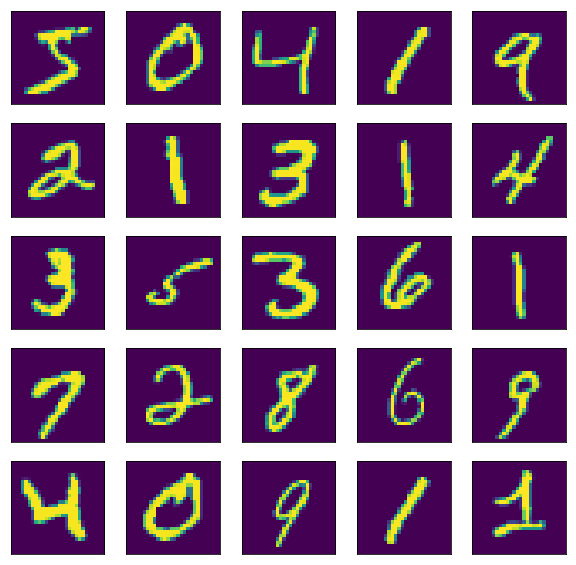

In [2]:
# load the dataset 
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#we can use the pyplot library to draw the image so we know what the dataset looks like
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i]) # , cmap='gray'
plt.show()

In [0]:
# Normalizing (rescale ) the images to the range of [0., 1.]
x_train, x_test = x_train / 255.0, x_test / 255.0

3.  **Bulid Model**




In [4]:
model = tf.keras.models.Sequential([
  # input: images of size 28x28 pixels 
  tf.keras.layers.Flatten(input_shape=x_train[0].shape),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  # output: classifying into 10 categories
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()# list the summary of the Layers (type), Output, Shape and Params 

W0616 18:35:29.299106 139988744968064 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


4. **Compile the model**

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###Tensorboard
TensorBoard is a suite of visualization tools to make it easier to understand, debug, and optimize TensorFlow programs

In [0]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime

timestamp = datetime.now().strftime("%Y-%m-%d _ %H:%M:%S")
NAME = "TB_log "+timestamp
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# tensorboard --logdir=path/to/log-directory

5.  **Train the Model**

In [7]:
model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard]) # we use (model.fit) for training the model


Epoch 1/5
   32/60000 [..............................] - ETA: 32:42 - loss: 2.3360 - acc: 0.0938

W0616 18:35:33.729212 139988744968064 callbacks.py:257] Method (on_train_batch_end) is slow compared to the batch update (0.129614). Check your callbacks.


60000/60000 [==============================] - 6s 106us/sample - loss: 0.2327 - acc: 0.9304
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0990 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0682 - acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0519 - acc: 0.9830
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0414 - acc: 0.9868


6.  **Evaluatet accuracy**

In [8]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test)
print('\n', 'Test loss:', score[0])
print('\n', 'Test accuracy:', score[1])

10000/10000 [==============================] - 1s 51us/sample - loss: 0.0822 - acc: 0.9750

 Test loss: 0.08224030920546502

 Test accuracy: 0.975


7. **Predict**


 The predicted number is : 4


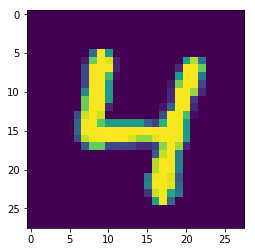

In [9]:
# let us choose a random image from the x_test dataset
random= 56 # put any random index. Note it should be in the range
predict = model.predict(x_test) # get predictions on the test set by using (model.predict)
value_of_prediction = np.argmax(predict[random])# argmax returns the indices of the maximum values along an axis
print('\n', 'The predicted number is :',value_of_prediction)
plt.imshow(x_test[random])#show if the prediction matches the real image


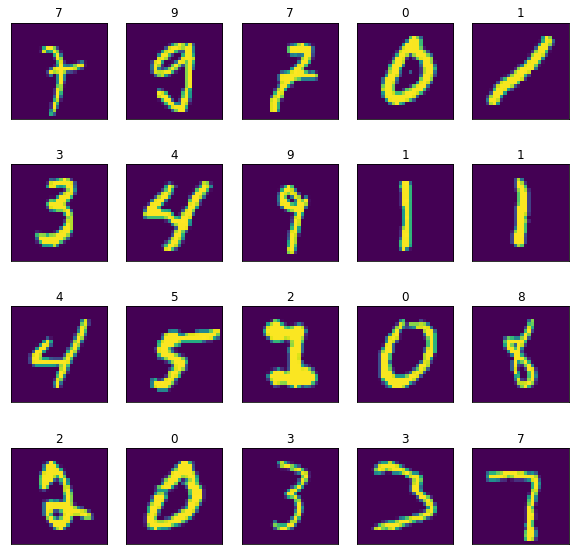

In [10]:
fig = plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=20, replace=False)): 
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))# , cmap='gray'
    pred_idx = np.argmax(predict[idx])
    ax.set_title("{}".format(pred_idx))

##Tensorboard (TF version 2.0)
Now in TF version 2.0 , TensorBoard can be used directly within notebook experiences such as Colab and Jupyter. This can be helpful for sharing results, integrating TensorBoard into existing workflows, and using TensorBoard without installing anything locally. [try it ](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/r2/tensorboard_in_notebooks.ipynb)

# Exercises

Reset All runtimes before you start doing your exercises

>**Runtime >> Reset All runtimes**

In [0]:
'''
# TODO: import tensorflow, matplotlib.pyplot, and numpy library
# write your code here

# TODO : load the dataset
mnist_dataset = tf.keras.datasets.mnist
(x_train_set, y_train_set),(x_test_set, y_test_set) = # write your code here


# TODO : normalizing the images
# write your code here

# TODO : build your model
new_model = # write your code here

# TODO : compile the model
# write your code here

# TODO : train your model
# write your code here

# TODO : evaluate and print your test accuracy
new_score = # write your code here
'''